In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('winequality-red.csv',delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot: xlabel='quality', ylabel='count'>

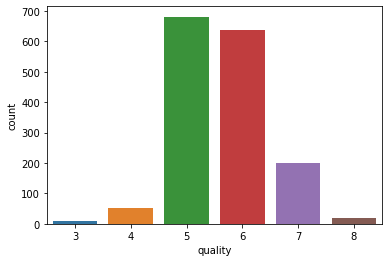

In [5]:
sns.countplot(x='quality',data=df)

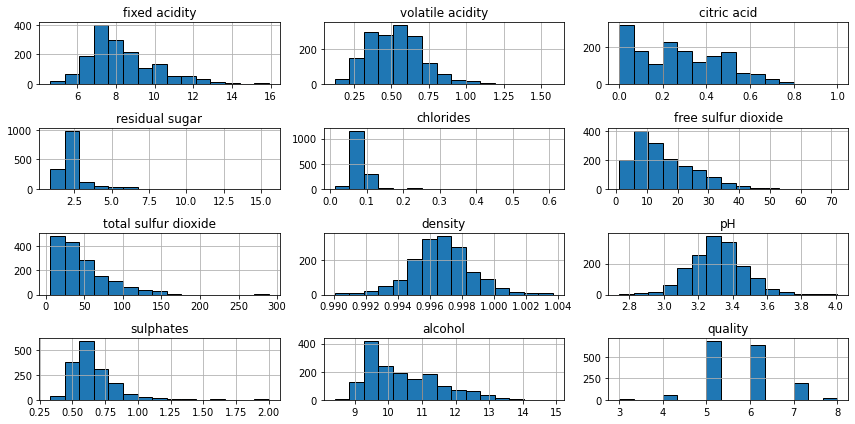

In [6]:
df.hist(bins=15,figsize=(12,6), edgecolor="black")
plt.tight_layout();

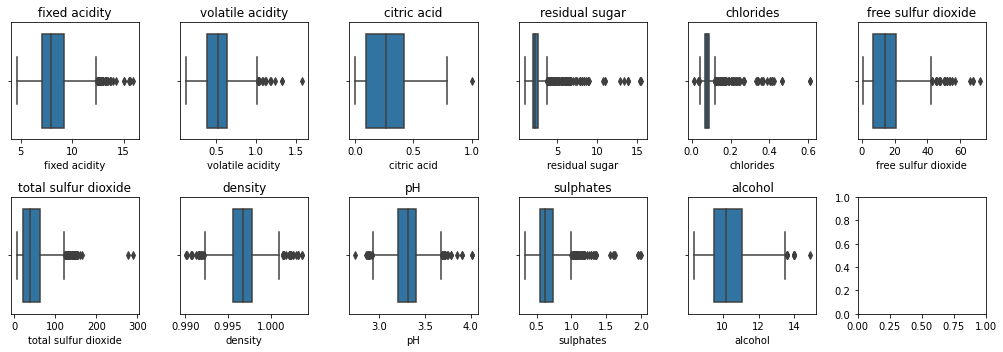

In [7]:
import math
vars=df.columns
y=6
x=math.ceil(len(df.columns)/y)

plt.subplots(x,y,figsize=(14,5))

for i in range(1,len(vars)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df,x=vars[i-1])
    plt.xlabel(vars[i-1])
    plt.title(vars[i-1])
plt.tight_layout()    
plt.show()

# residual sugar / chlorides / total and free sulfur dioxide have outliers

In [8]:
upper =df.quantile(0.75)+1.5 *(df.quantile(0.75)-df.quantile(0.25))
lower = df.quantile(0.25)-1.5 *(df.quantile(0.75)-df.quantile(0.25))

columns_to_be_checked=vars[:-1]

for i in columns_to_be_checked:
    print('\nColumn -> ',i)
    x= df[ (df[i]<round(lower[i],2)) |  (df[i]>round(upper[i],2))][i].to_list()
    print('No of Outliers present -> ',len(x))
    print('\n','*'*10)



Column ->  fixed acidity
No of Outliers present ->  49

 **********

Column ->  volatile acidity
No of Outliers present ->  15

 **********

Column ->  citric acid
No of Outliers present ->  1

 **********

Column ->  residual sugar
No of Outliers present ->  155

 **********

Column ->  chlorides
No of Outliers present ->  109

 **********

Column ->  free sulfur dioxide
No of Outliers present ->  30

 **********

Column ->  total sulfur dioxide
No of Outliers present ->  55

 **********

Column ->  density
No of Outliers present ->  71

 **********

Column ->  pH
No of Outliers present ->  31

 **********

Column ->  sulphates
No of Outliers present ->  58

 **********

Column ->  alcohol
No of Outliers present ->  13

 **********


<AxesSubplot: >

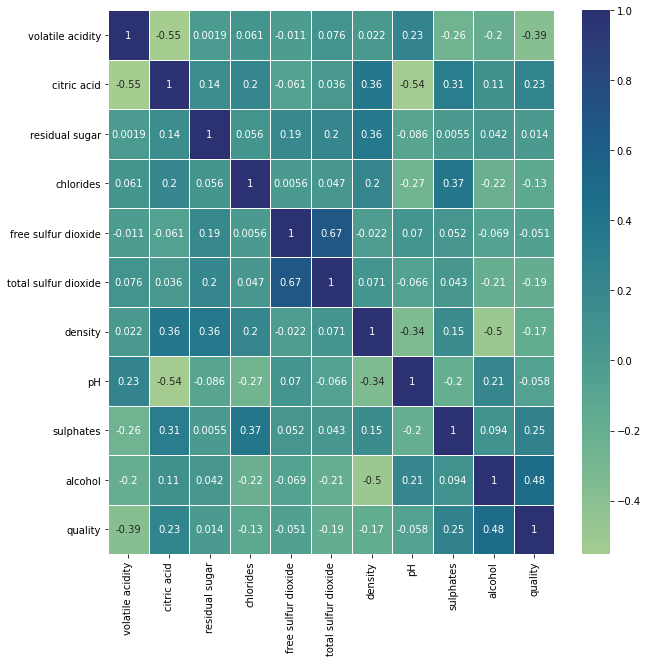

In [9]:

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.iloc[:, 1:13:].corr(), annot=True, linewidths=.5, ax=ax,cmap='crest')

# sulphates / alchol / citric acids

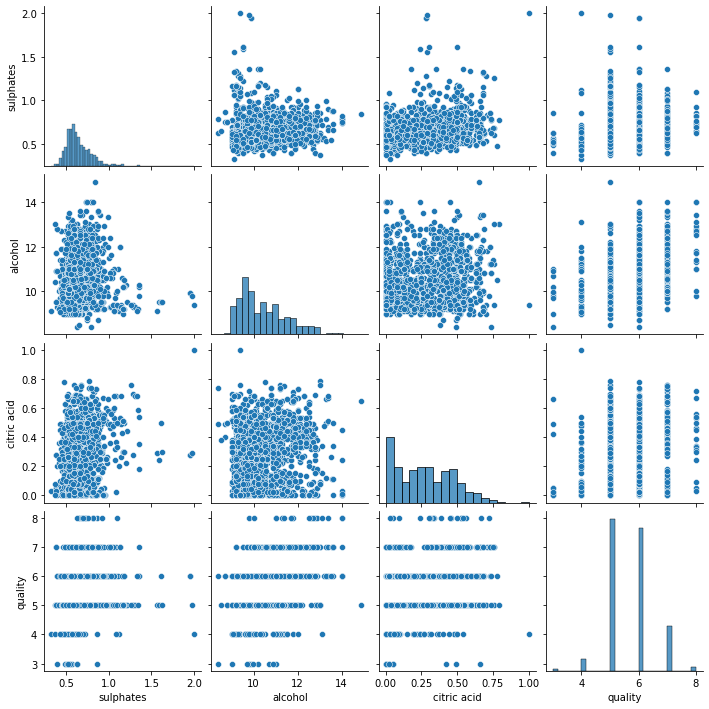

In [10]:
corr = df.loc[:,['sulphates','alcohol','citric acid','quality']]
pair = sns.pairplot(corr)
pair.fig.set_size_inches(10,10)

In [11]:
quality = df.groupby('quality').sum()
quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,83.6,8.845,1.71,26.35,1.225,110.0,249.0,9.97464,33.98,5.70,99.550000
4,412.3,36.780,9.23,142.80,4.806,650.0,1921.0,52.81675,179.22,31.61,544.050000
5,5561.9,392.965,165.95,1722.15,63.153,11566.0,38486.0,679.02757,2250.67,422.88,6741.700000
6,5325.5,317.395,174.70,1580.45,54.202,10024.0,26075.0,635.84041,2116.93,430.86,6781.633333
7,1765.6,80.380,74.66,541.40,15.241,2795.0,6969.0,198.22475,654.86,147.51,2281.716667
8,154.2,7.620,7.04,46.40,1.232,239.0,602.0,17.91382,58.81,13.82,217.700000


In [12]:
print("The quality with the highest features:")
print("Quality :",quality['alcohol'].idxmax(),"Alcohol :",quality['alcohol'].max())
print("Quality :",quality['sulphates'].idxmax(),"Sulphates :",quality['sulphates'].max())
print("Quality :",quality['citric acid'].idxmax(),"Citric Acid :",quality['citric acid'].max())

The quality with the highest features:
Quality : 6 Alcohol : 6781.63333333333
Quality : 6 Sulphates : 430.86000000000007
Quality : 6 Citric Acid : 174.70000000000024
